## News Mood

The first plot will be and/or feature the following:


Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.


The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:


Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.

In [7]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
#import Twitter_API_Keys
import seaborn as sns

In [8]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
# Twitter API Keys
consumer_key = "r88UzgUheSOF3pMyINIT5yITY"
consumer_secret = "kq3NV0k5Dlq4uCucw5Nf0sJAuP09l0Xja1pNc1DenZoxWSKwxk"
access_token = "421125873-OuCvIPTHHMqC9t8uG8CTSBLi7iK4NNEyZeDQMc9w"
access_token_secret = "EC2ookZjWBWKo5MpCoEEtrg2OGiF8WZZ1LCiv4nxl45tH"

In [10]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews","CNN","BBCWorld","CBSNews","nytimes"]

In [47]:
# Target Search Term
target_terms = ("@BBC","@CBSNews","@CNN","@FoxNews", "@nytimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times (total of 1000 tweets)
    for x in range(10):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                    tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)

    # Store the Average Sentiments
    sentiment = {"User": target,
                 "Date": tweet["created_at"],
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet Count": len(compound_list)}

    # Print the Sentiments
    print(sentiment)
    print("")

{'User': '@BBC', 'Date': 'Mon Aug 20 13:34:47 +0000 2018', 'Compound': 0.18301639344262294, 'Positive': 0.10726229508196722, 'Neutral': 0.02442622950819672, 'Negative': 0.868311475409836, 'Tweet Count': 305}

{'User': '@CBSNews', 'Date': 'Mon Aug 20 13:50:31 +0000 2018', 'Compound': -0.017372045454545446, 'Positive': 0.09820454545454546, 'Neutral': 0.10397727272727272, 'Negative': 0.7978181818181818, 'Tweet Count': 440}

{'User': '@CNN', 'Date': 'Mon Aug 20 13:57:20 +0000 2018', 'Compound': -0.12181505102040818, 'Positive': 0.0469234693877551, 'Neutral': 0.10282142857142858, 'Negative': 0.8502551020408163, 'Tweet Count': 392}

{'User': '@FoxNews', 'Date': 'Mon Aug 20 13:57:29 +0000 2018', 'Compound': -0.11296397849462365, 'Positive': 0.06106989247311828, 'Neutral': 0.09837634408602151, 'Negative': 0.8405537634408602, 'Tweet Count': 372}

{'User': '@nytimes', 'Date': 'Mon Aug 20 13:56:55 +0000 2018', 'Compound': 0.042090931989924425, 'Positive': 0.08449622166246852, 'Neutral': 0.0666020

In [48]:
# Convert sentiment to DataFrame
sentiment_df = pd.DataFrame(sentiment)
sentiment_df

ValueError: If using all scalar values, you must pass an index

In [41]:
#Export the new CSV
sentiment.to_csv(".csv", index=False)

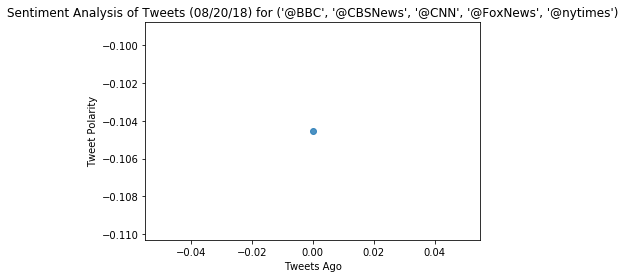

In [37]:
# Create plot
plt.plot(np.arange(len(sentiment["Compound"])),
          sentiment["Compound"], marker="o", linewidth=0.5,
          alpha=0.8)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_terms))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

# Sentiment Bar graph

In [38]:
#Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

#View the polarities
pd.DataFrame(tweet_df_polarity)

NameError: name 'tweet_df' is not defined

In [21]:
#Store all polarities in a tuple 
tweets_polarity = (tweet_df_polarity["BBC News (World)"],
                        tweet_df_polarity["CBS News"],
                        tweet_df_polarity["CNN"],
                        tweet_df_polarity["Fox News"],
                        tweet_df_polarity["The New York Times"])

#Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="skyblue")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="skyblue")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color="skyblue")
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color="skyblue")

#Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '+%.2f' % float(height)),ha='center', va='bottom'
def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')

SyntaxError: can't assign to function call (<ipython-input-21-138b993d857f>, line 23)